# 가위바위보 이미지 활용

In [8]:
!pip install opencv-python

     |████████████████████████████████| 46.4 MB 43.9 MB/s eta 0:00:01


In [2]:
!pip install tensorflow

     |████████████████████████████████| 244.3 MB 92.9 MB/s eta 0:00:01
     |████████████████████████████████| 439 kB 51.8 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 65.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 83.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 24.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 100.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 70.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 91.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 70.9 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 57.9 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 77.5 MB/s eta 0:00:01


In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

In [12]:
C = os.listdir('./RSP_TrainData/C/')
R = os.listdir('./RSP_TrainData/R/')
P = os.listdir('./RSP_TrainData/P/')
# N = os.listdir('./RSP_TrainData/N/')

In [22]:
R

['00018R.jpeg',
 'IMG_7877.jpeg',
 'IMG_7898.jpeg',
 'IMG_7932.jpeg',
 'IMG_7924.jpeg',
 '00060R.jpeg',
 '00025R.jpeg',
 'IMG_7908.jpeg',
 '00044R.jpeg',
 '00001R.jpeg',
 '00084R.jpeg',
 'IMG_7949.jpeg',
 '00079R.jpeg',
 '00086R.jpeg',
 'IMG_7894.jpeg',
 'IMG_7882.jpeg',
 'IMG_7928.jpeg',
 '00046R.jpeg',
 '00003R.jpeg',
 'IMG_7904.jpeg',
 '00062R.jpeg',
 '00027R.jpeg',
 'IMG_7953.jpeg',
 'IMG_7945.jpeg',
 'IMG_7912.jpeg',
 'IMG_7913.jpeg',
 '00066R.jpeg',
 '00023R.jpeg',
 'IMG_7944.jpeg',
 'IMG_7952.jpeg',
 '.DS_Store',
 'IMG_7905.jpeg',
 '00082R.jpeg',
 'IMG_7883.jpeg',
 'IMG_7929.jpeg',
 '00042R.jpeg',
 '00007R.jpeg',
 'IMG_7895.jpeg',
 '00040R.jpeg',
 '00005R.jpeg',
 'IMG_7948.jpeg',
 '00038R.jpeg',
 '00080R.jpeg',
 'IMG_7909.jpeg',
 '00059R.jpeg',
 'IMG_7925.jpeg',
 '00064R.jpeg',
 '00021R.jpeg',
 'IMG_7876.jpeg',
 'IMG_7899.jpeg',
 'IMG_7933.jpeg',
 '00099R.jpeg',
 '00002R.jpeg',
 '00047R.jpeg',
 'IMG_7938.jpeg',
 'IMG_7892.jpeg',
 'IMG_7884.jpeg',
 'IMG_7863.jpg',
 '00087R.jpeg',

In [15]:
print(len(C))
print(len(P))
print(len(R))
# print(len(N))

171
205
202


## 이미지 파일을 새롭게 저장
> EX) C0 ~ C10 <br>
각각의 리스트로 저장

In [ ]:
src = cv2.imread(f'./RSP_TrainData/R/')

In [20]:
def saveDir(x, name) : 
    li = []
    
    for idx, y in enumerate(x) :
        src = cv2.imread(f'./RSP_TrainData/{name}/{y}')
        src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        globals()[f'{name}{idx}'] = cv2.resize(src, dsize=(640, 640), interpolation=cv2.INTER_AREA)
        li.append(globals()[f'{name}{idx}'])
        
    globals()[f'np{name}'] = np.array([li])
    globals()[f'np{name}'] = globals()[f'np{name}'].reshape(len(globals()[f'np{name}'][0]),
                                                           len(globals()[f'np{name}'][0][0]),
                                                           len(globals()[f'np{name}'][0][0][0]))

In [21]:
saveDir(R, "R")
saveDir(C, "C")
saveDir(P, "P")
# saveDir(N, "N")

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [23]:
def makeYTrain(x, name, num): 
    li = []
    for i in range(len(x)):
        li.append(num)
        globals()[f'npY{name}'] = np.array([li])
        globals()[f'npY{name}'] = globals()[f'npY{name}'].reshape(len(globals()[f'npY{name}'][0]))
        

In [24]:
makeYTrain(npR, "R", 0)
makeYTrain(npC, "C", 1)
makeYTrain(npP, "P", 2)
makeYTrain(npN, "N", 3)

In [25]:
print(npYC.shape)
print(npYR.shape)
print(npYP.shape)
print(npYN.shape)

(170,)
(201,)
(204,)
(100,)


## Train Data set.

In [26]:
X_train = np.vstack([npR, npC, npP, npN])
y_train = np.hstack([npYR, npYC, npYP, npYN])
print(X_train.shape)
print(y_train.shape)
print(y_train[0])

# 카테고리 컬
y_trn = to_categorical(y_train)
print(y_trn[0])

(675, 640, 640)
(675,)
0
[1. 0. 0. 0.]


## Model Set


In [37]:

model1 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(640,640,1)),
    tf.keras.layers.Dense(4, activation='softmax')
])
model2 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(640,640,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model3 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(640,640,1)),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model4 = tf.keras.models.Sequential([         
    tf.keras.layers.Flatten(input_shape=(640,640,1)),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
# CNN Model.
model5 = tf.keras.models.Sequential([         
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(640,640,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])
 # 결론 : 히든레이어를 많이 넣을 필요가 없다.

## 모데 학습 및 평가 함수 생성

In [38]:
def mdFit(model, num, X_train, y_train) : 
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.summary()

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=32, epochs=50, verbose=1,
        validation_split=0.1) #callbacks=callback, 
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst)
    
# def mdPred(model, X_tst):
#     result = model.predict(X_tst)
#     return result

In [34]:
y_train[1]

0

## 모델 학습 실행

In [39]:
mdList = [model5] # model1, model2, model3, model4

for num, model in enumerate(mdList):
    mdFit(model, num, X_train, y_trn)
    
# accuracy가 높고, val_accuracy가 낮으면 과적합 판단.

# batchsize를 줄여야 커널 터지는걸 방지 할 수 있다.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 638, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 319, 319, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 317, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 158, 158, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 156, 64)      36928     
                                                                 
 flatten_8 (Flatten)         (None, 1557504)          

KeyboardInterrupt: 

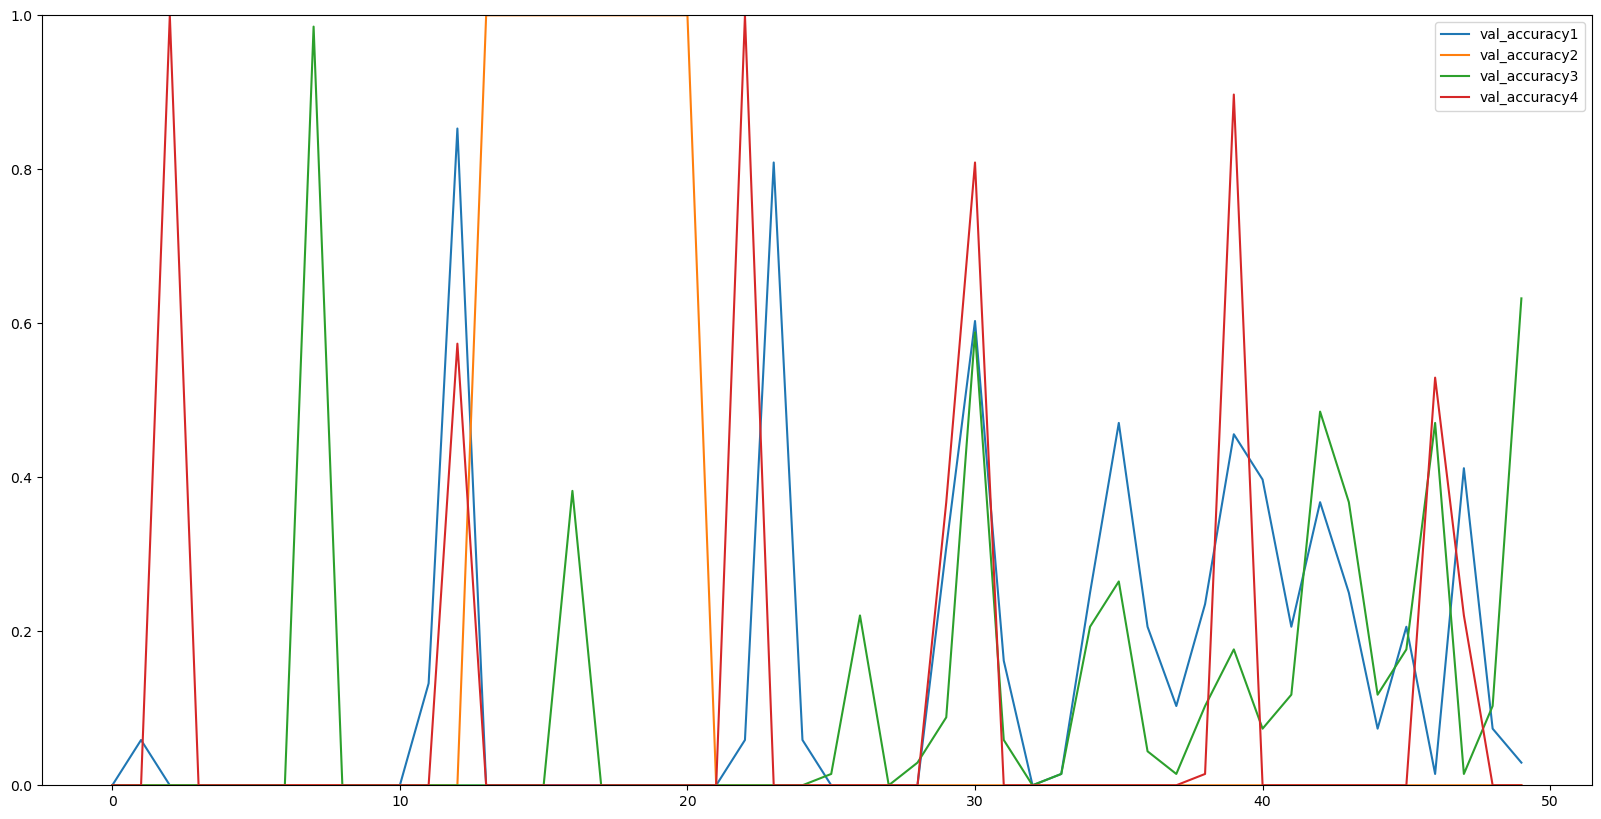

In [32]:
plt.figure(figsize=(20,10))
# plt.plot(hist1.history['val_loss'], label='val_loss1')
# plt.plot(hist2.history['val_loss'], label='val_loss2')
# plt.plot(hist3.history['val_loss'], label='val_loss3')
# plt.plot(hist4.history['val_loss'], label='val_loss4')
plt.plot(hist0.history['val_accuracy'], label='val_accuracy1')
plt.plot(hist1.history['val_accuracy'], label='val_accuracy2')
plt.plot(hist2.history['val_accuracy'], label='val_accuracy3')
plt.plot(hist3.history['val_accuracy'], label='val_accuracy4')
# plt.plot(hist4.history['val_accuracy'], label='val_accuracy5')
plt.ylim(0, 1)
plt.legend()

#batchsize : 323